# Super store sales Analysis 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
import os

In [4]:
import numpy as np

In [6]:
pd.set_option("display.float_format",lambda x: "%.3f" %x)

In [8]:
os.chdir("C://Users//Administrator//OneDrive//Documents//Python//Excel files//Python Datasets//Super Store Data")

In [12]:
store_data = pd.read_csv("superstore_dataset2011-2015.csv",encoding= "ISO-8859-1")

In [14]:
store_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.000,106.140,35.460,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.100,36.036,9.720,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.000,29.640,8.170,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.500,-26.055,4.820,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.100,37.770,4.700,Medium


# Data Cleaning

In [17]:
store_data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

# shape of the dataset

In [28]:
shape = store_data.shape
print("Number of columns are : {}".format(shape[1]))
print("Number of rows are {}".format(shape[0]))

Number of columns are : 24
Number of rows are 51290


# detailed info the dataset

In [31]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

# check for duplicated values and drop them

In [34]:
store_data.duplicated().any()

False

# Get overall statistics of the dataset

In [37]:
store_data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000,9994.000,51290.000,51290.000,51290.000,51290.000,51290.000
mean,25645.500,55190.379,246.491,3.477,0.143,28.611,26.376
std,14806.292,32063.693,487.565,2.279,0.212,174.341,57.297
min,1.000,1040.000,0.444,1.000,0.000,-6599.978,0.000
25%,12823.250,23223.000,30.759,2.000,0.000,0.000,2.610
50%,25645.500,56430.500,85.053,3.000,0.000,9.240,7.790
75%,38467.750,90008.000,251.053,5.000,0.200,36.810,24.450
max,51290.000,99301.000,22638.480,14.000,0.850,8399.976,933.570


# drop unnecessary columns 

In [40]:
store_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [42]:
store_data = store_data.drop(columns = ["Row ID","Order ID","Postal Code"],axis =1)

In [44]:
store_data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

# Hypothesis 1 - Technology products having higher profit margin as compare to other products

In [56]:
cat_data = store_data.groupby(["Category"]).agg({"Profit":"sum"})

In [60]:
cat_data["Profit"] = round(cat_data["Profit"])

In [62]:
cat_data

,Profit
Category,
Furniture,285205.000
Office Supplies,518474.000
Technology,663779.000


In [66]:
import seaborn as sns

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16008\609692236.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=  sns.barplot(data = cat_data,y="Category",x="Profit",palette ="mako")


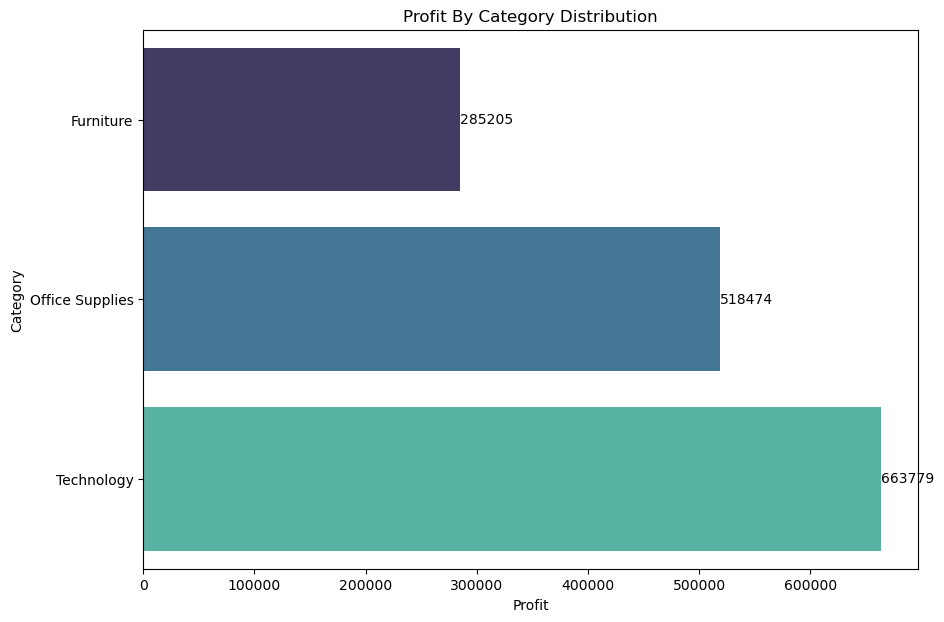

In [80]:
plt.figure(figsize=(10,7))
ax=  sns.barplot(data = cat_data,y="Category",x="Profit",palette ="mako")
for x in ax.containers :
    ax.bar_label(x)
plt.title("Profit By Category Distribution")
plt.show()

Hence Hypothesis is supported as technology products having highest profit as compare to other products category

# Hypothesis 2- the east region is having higher sales as compare to other regions

In [84]:
store_data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [88]:
region_sales = store_data.groupby(["Region"]).agg({"Sales":"sum"}).sort_values(by="Sales",ascending = False)

In [90]:
region_sales

,Sales
Region,
Central,2822302.520
South,1600907.041
North,1248165.603
Oceania,1100184.612
Southeast Asia,884423.169
North Asia,848309.781
EMEA,806161.311
Africa,783773.211
Central Asia,752826.567


In [100]:
store_data["Region"].unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Central Asia', 'West',
       'North Asia', 'Central', 'South', 'Canada', 'Southeast Asia',
       'East', 'Caribbean'], dtype=object)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16008\3830767265.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_1 = sns.barplot(data= region_sales,x="Region",y="Sales",order=order,palette="plasma")


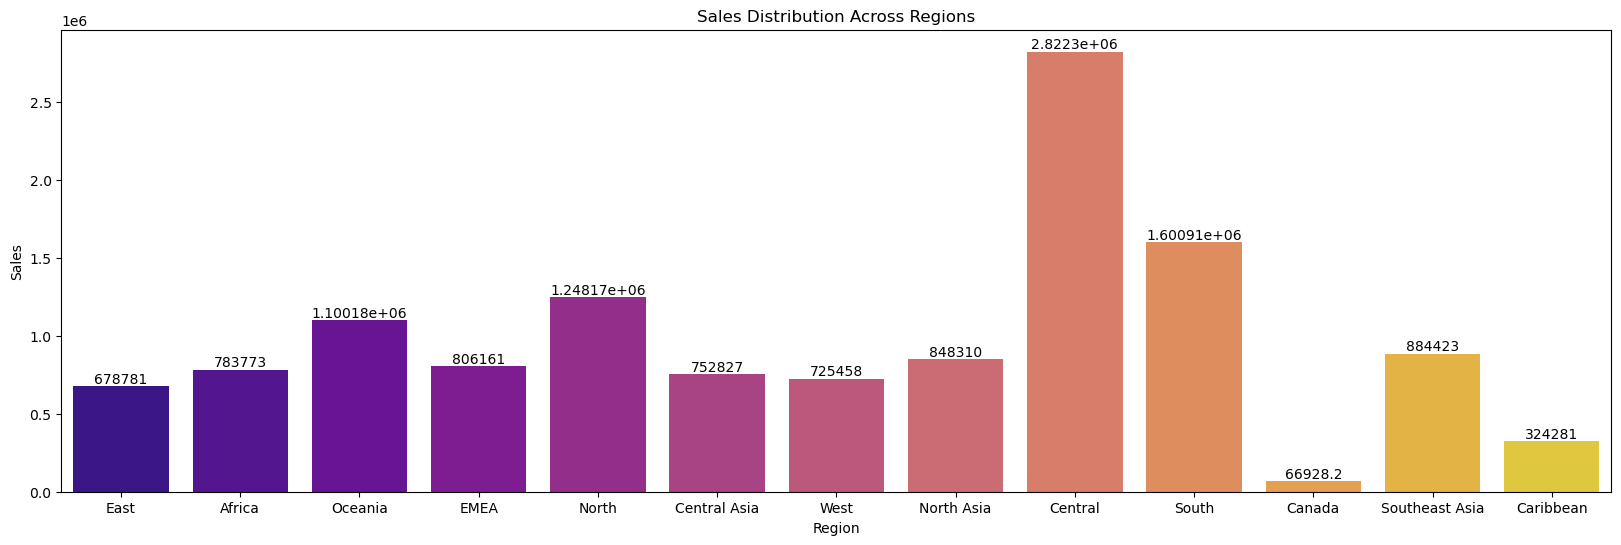

In [106]:
plt.figure(figsize = (20,6))
order = [ 'East','Africa', 'Oceania', 'EMEA', 'North', 'Central Asia', 'West',
       'North Asia', 'Central', 'South', 'Canada', 'Southeast Asia',
       'Caribbean']
ax_1 = sns.barplot(data= region_sales,x="Region",y="Sales",order=order,palette="plasma")
for x in ax_1.containers:
    ax_1.bar_label(x)
plt.title("Sales Distribution Across Regions")
plt.show()

Conclusion - Hypothesis is not supported as the central region having higher sales as compare to othe regions

# Hypothesis 3 - Sales are higher during the certain months of the year

In [110]:
store_data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [114]:
store_data["Order Month"] = pd.DatetimeIndex(store_data["Order Date"]).month

In [116]:
store_data.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Month
0,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.000,106.140,35.460,Medium,1
1,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.100,36.036,9.720,Medium,1
2,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.000,29.640,8.170,High,1
3,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.500,-26.055,4.820,High,1
4,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.100,37.770,4.700,Medium,1


In [118]:
monthly_sales = store_data.groupby(["Order Month"]).agg({"Sales":"sum"})

In [120]:
monthly_sales["Sales"] = round(monthly_sales["Sales"],2)

In [122]:
monthly_sales

,Sales
Order Month,
1,775766.910
2,722853.170
3,951333.080
4,851617.320
5,976415.680
6,1152367.790
7,838743.560
8,1247500.810
9,1244139.730


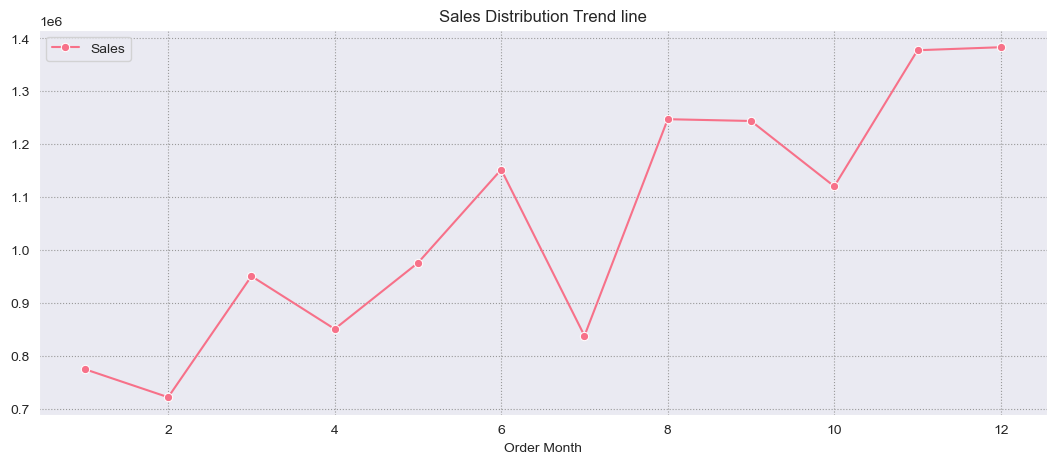

In [144]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize= (13,5))
sns.lineplot(data = monthly_sales,markers="o",palette = "husl")
plt.title("Sales Distribution Trend line")
plt.show()

Conclusion - Hypothesis is supported as only for november and december having higher sales

# Hypothesis 4 - Orders with same day shipping having lowest rate of returned products

In [148]:
store_data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Order Month'],
      dtype='object')

In [150]:
store_data["Ship Mode"].unique()

array(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
      dtype=object)

In [152]:
total_orders_by_shipping_mode = store_data.groupby("Ship Mode").size()

In [162]:
return_orders_shipping = store_data[store_data["Profit"]<0].groupby("Ship Mode").size()

In [164]:
return_percentage=  (return_orders_shipping/total_orders_by_shipping_mode)*100

In [166]:
print(return_percentage)

Ship Mode
First Class      25.077
Same Day         23.917
Second Class     24.076
Standard Class   24.481
dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16008\1466493697.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_1 =  sns.barplot(data = return_percentage,palette ="rocket")


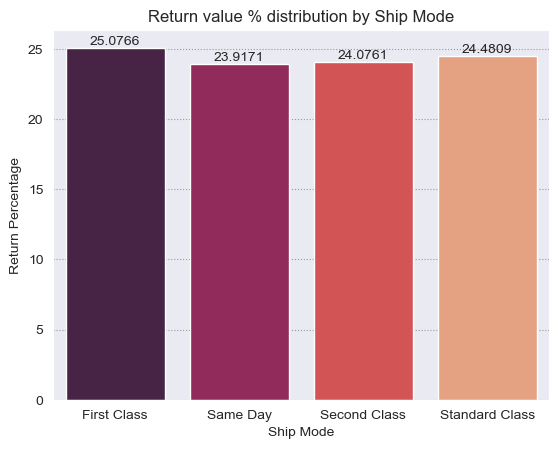

In [172]:
ax_1 =  sns.barplot(data = return_percentage,palette ="rocket")
for x in ax_1.containers:
    ax_1.bar_label(x)
plt.ylabel("Return Percentage")
plt.title("Return value % distribution by Ship Mode")
plt.show()

Conclusion - Hypothesis is supported as Same Day delivery ship mode having low Return %

# Hypothesis 5 - Company's Profit is more on weekdays as compare to weekends

In [176]:
store_data["Order Week Day"] = pd.DatetimeIndex(store_data["Order Date"]).day_name()

In [178]:
store_data.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Month,Order Week Day
0,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.000,106.140,35.460,Medium,1,Saturday
1,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.100,36.036,9.720,Medium,1,Saturday
2,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.000,29.640,8.170,High,1,Saturday
3,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.500,-26.055,4.820,High,1,Saturday
4,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.100,37.770,4.700,Medium,1,Saturday


In [180]:
weekly_profit = store_data.groupby(["Order Week Day"]).agg({"Profit":"sum"})

In [182]:
weekly_profit["Profit"] = round(weekly_profit["Profit"],2)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16008\90942736.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_3= sns.barplot(data = weekly_profit, x= "Order Week Day",y="Profit",order=ordering,palette="winter")


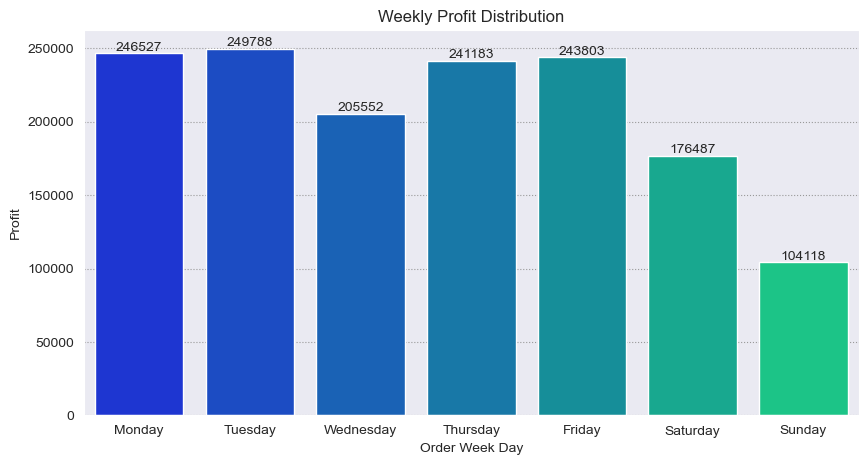

In [190]:
ordering = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
plt.figure(figsize = (10,5))
ax_3= sns.barplot(data = weekly_profit, x= "Order Week Day",y="Profit",order=ordering,palette="winter")
for x in ax_3.containers:
    ax_3.bar_label(x)
plt.title("Weekly Profit Distribution")
plt.show()

Conclusion - Hypothesis is supported as company profit on weekdays are genuinly higher as compare to weekends